# Part 3 - Plotting material cross sections

OpenMC can also be used to plot neutron interaction cross sections for specific materials.

This python notebook allows users to plot neutron interaction cross sections for specific materials using OpenMC.

These plots show the <b>Macroscopic</b> cross section which is the the effective target area of all of the nuclei contained in the volume of the material.

Macroscopic cross section (Σ) is related to Microscopic cross section (σ) with the following equation.

Σ=σ.N

Where N is the number density of nuclei in units of nuclei / $\mathrm{m}^3$.

The units of Macroscopic cross section are therefore $\mathrm{m}^{-1}$.

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/ec5BLLL6Q_g", width=560, height=340)

This code block imports a function and packages needed for the task.

In [2]:
import openmc
openmc.config['cross_sections'] = '/home/nuclearkid/openmc_conda/openmc_data/endfb80/endfb-viii.0-hdf5/cross_sections.xml'

To plot neutron interaction cross sections for a material we first need to create that material in OpenMC. Making materials is covered in the next task but for now, the following code block makes a steel material from Iron and Carbon.

In [3]:
steel_mat = openmc.Material()
steel_mat.add_element('Fe', 0.975)
steel_mat.add_element('C', 0.025)
steel_mat.set_density('g/cm3', 7.7)
steel_mat.name = 'Steel'

This next code block plots the total macroscopic neutron interaction cross section (n,total) for the material we just created.

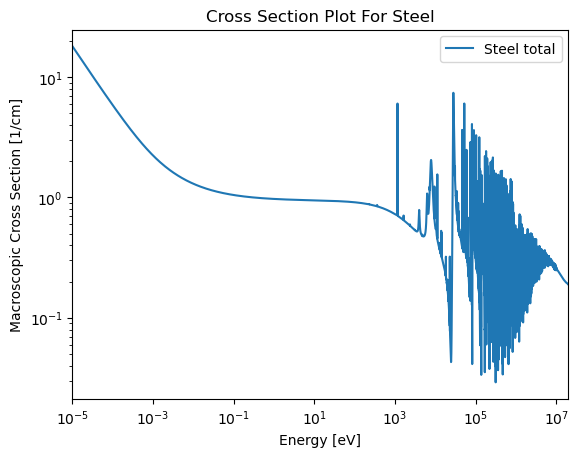

In [4]:
import matplotlib.pyplot as plt

openmc.plotter.plot_xs(
    reactions = {
        steel_mat: ['total'],
    }
)
plt.title = 'Total cross section'
plt.savefig('total_cross_section_pushers.png', dpi=400)

The next code block makes two variations of a Lithium ceramic material. One has natural levels of Li6 and Li7 while the other has an enriched level of Li6.

In [5]:
# creates an openmc material for Li4SiO4
natural_Li4SiO4 = openmc.Material(name = 'natural Li4SiO4')
natural_Li4SiO4.add_elements_from_formula(
    'Li4SiO4',
    percent_type='ao'
)
natural_Li4SiO4.set_density('g/cm3', 1.877)


# creates an openmc material for Li4SiO4 with Li6 enrichment of 60%
enriched_Li4SiO4 = openmc.Material(name = 'enriched Li4SiO4')
enriched_Li4SiO4.add_elements_from_formula(
    'Li4SiO4',
    percent_type='ao',
    enrichment=60,
    enrichment_target='Li6',
    enrichment_type='ao'
)
enriched_Li4SiO4.set_density('g/cm3', 1.844)
# Note, this density is lower than naturally enriched Li4SiO4
# This is because Li6 is lighter than Li7

This code block then plots the tritium production cross section for each ceramic.

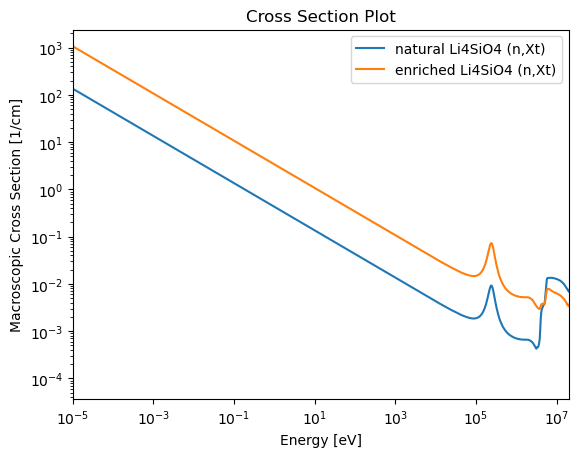

In [6]:
openmc.plotter.plot_xs(
    reactions = {
        natural_Li4SiO4: ['(n,Xt)'],
        enriched_Li4SiO4: ['(n,Xt)'],
    }
)

plt.show()

The enriched Lithium ceramic has a higher tritium production cross section than the non-enriched Lithium ceramic. This is because Li6 has a much higher (n,Xt) cross section than Li7 (at low energies).

**Learning Outcomes for Part 3:**
- OpenMC can be used to plot interaction cross sections for materials.
- Lithium-6 enrichment increases tritium production from low energy neutrons.